<a href="https://colab.research.google.com/github/naveenthumati95/time-series-analysis-models/blob/main/simple_lstm_impl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
# Importing all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from keras.models import Sequential
from keras.layers import Dense, LSTM, Flatten
warnings.filterwarnings('ignore')

In [12]:
# Note: This nb is implemented by watch tutorial in youtube link:https://www.youtube.com/watch?v=UbvkhuqVqUI
# in this nb we are going to implement LSTM on univariate time series data
# PS: sales = [110, 125, 133, 146, 158, 172, 187, 196, 210]
# Our aim is to use past 3 days data and predict the sales for today, like wise we will forecast for next 10 days
# Data preprocessing:
#     X           y
# t1  t2  t3
# 110 123 133    146
# .....
# 187 196 210     ?

# splitting function for dep and indep features
def prepare_data(ts_data, n_steps):
    X,y=[],[]
    for i in range(len(ts_data)):
      end_x=i+n_steps
      if end_x>len(ts_data)-1:
        break
      cur_x,cur_y=ts_data[i:end_x],ts_data[end_x]
      X.append(cur_x)
      y.append(cur_y)
    return np.array(X),np.array(y)

In [14]:
# input data
ts_data=[110, 125, 133, 146, 158, 172, 187, 196, 210]
# no of time steps
n_steps=3
# splitting into samples
X,y=prepare_data(ts_data,n_steps)

In [15]:
# reshaping from [samples,timesteps] -> [samples,timesteps,features]
n_features=1
X=X.reshape((X.shape[0],X.shape[1],n_features))

In [19]:
# building simple LSTM
model=Sequential()
model.add(LSTM(50,activation='relu',return_sequences=True,input_shape=(n_steps,n_features)))
model.add(LSTM(50,activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

model.fit(X,y,epochs=200,verbose=0)

In [22]:
# predicting for the next 10 days
cur_x=[187,196,210]
y_pred=[]
for i in range(10):
  cur_x=np.array(cur_x)
  cur_x=cur_x.reshape((1,n_steps,n_features))
  pred_y=model.predict(cur_x)
  y_pred.append(pred_y[0][0])
  cur_x=np.append(cur_x[0],pred_y[0][0])
  cur_x=cur_x[1:]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


In [23]:
# predicting for next 10 days
y_pred

[np.float32(224.7946),
 np.float32(235.07793),
 np.float32(248.63255),
 np.float32(262.8596),
 np.float32(274.59598),
 np.float32(288.52322),
 np.float32(302.9677),
 np.float32(316.2672),
 np.float32(331.08096),
 np.float32(346.34232)]

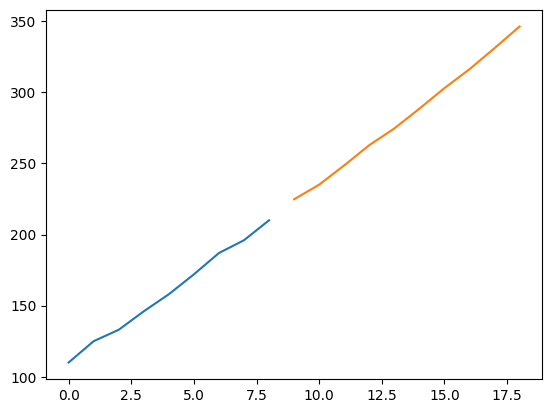

In [24]:
plt.plot(ts_data)
plt.plot(np.arange(len(ts_data),len(ts_data)+len(y_pred)),y_pred)